In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization,Dense, Reshape, Dropout # type: ignore
from tensorflow.keras.regularizers import l2
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import pydot
from tensorflow.keras.utils import model_to_dot, plot_model
from IPython.display import SVG
import matplotlib.gridspec as gridspec



## 数据准备

In [4]:
inputs_loaded=np.loadtxt("inputs_dataset.csv", delimiter=",")
N=len(inputs_loaded)
array_2d_loaded = np.loadtxt("targets_dataset.csv", delimiter=",")
targets_loaded = array_2d_loaded.reshape(N, 81, 4)

In [5]:
#train, validation and test sets division
alpha=0.7
beta=0.8
inputs_all =inputs_loaded
targets_all=targets_loaded 
inputs_train=inputs_all[0:int(N*alpha)]
targets_train=targets_all[0:int(N*alpha)]
inputs_val=inputs_all[int(N*alpha):int(N*beta)]
targets_val=targets_all[int(N*alpha):int(N*beta)]
inputs_test=inputs_all[int(N*beta):]
targets_test=targets_all[int(N*beta):]

np.random.seed(11)
np.random.shuffle(inputs_train)
np.random.seed(11)
np.random.shuffle(targets_train)

np.random.seed(14)
np.random.shuffle(inputs_val)
np.random.seed(14)
np.random.shuffle(targets_val)

## 训练

Epoch 1/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0559 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 2/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0184 - val_loss: 0.0265 - learning_rate: 0.0010
Epoch 3/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - val_loss: 0.0177 - learning_rate: 0.0010
Epoch 4/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0139 - val_loss: 0.0149 - learning_rate: 0.0010
Epoch 5/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0122 - val_loss: 0.0130 - learning_rate: 0.0010
Epoch 6/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 7/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - val_loss: 0.0127 - learning_rate: 0.0010
Epoch 8/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0105 - val_loss: 0.0144 - learning_rate: 0.0010
Epoch 9/200
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - val_loss: 0.0102 - learning_rate: 0.0010
E

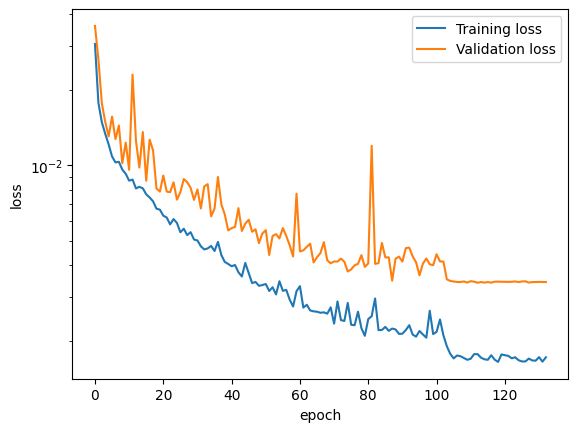

In [58]:
model = Sequential()
model.add(Dense(285, input_dim=16, activation='relu',kernel_regularizer=l2(0.00000)))
model.add(BatchNormalization())

model.add(Dense(400, activation='relu',kernel_regularizer=l2(0.00000000)))
# model.add(BatchNormalization())
# model.add(Dropout(0.1)) 

model.add(Dense(486, activation='tanh',kernel_regularizer=l2(0.000000)))


model.add(Dense(600, activation='relu'))                    

model.add(Dense(506, activation='relu',kernel_regularizer=l2(0.000000)))
model.add(BatchNormalization())

model.add(Dense((81*4), activation='tanh'))
model.add(Reshape((81, 4)))

model.compile(loss='mean_squared_error', optimizer='adamw')

# model.compile(loss='gzj_lossfun', optimizer='adamw')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.005, patience=15, min_lr=1e-6)

history = model.fit(inputs_train, targets_train, epochs=200, batch_size=32, 
                    validation_data=(inputs_val, targets_val),
                    callbacks=[early_stopping, lr_scheduler])           
                    
mse = model.evaluate(inputs_val, targets_val)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


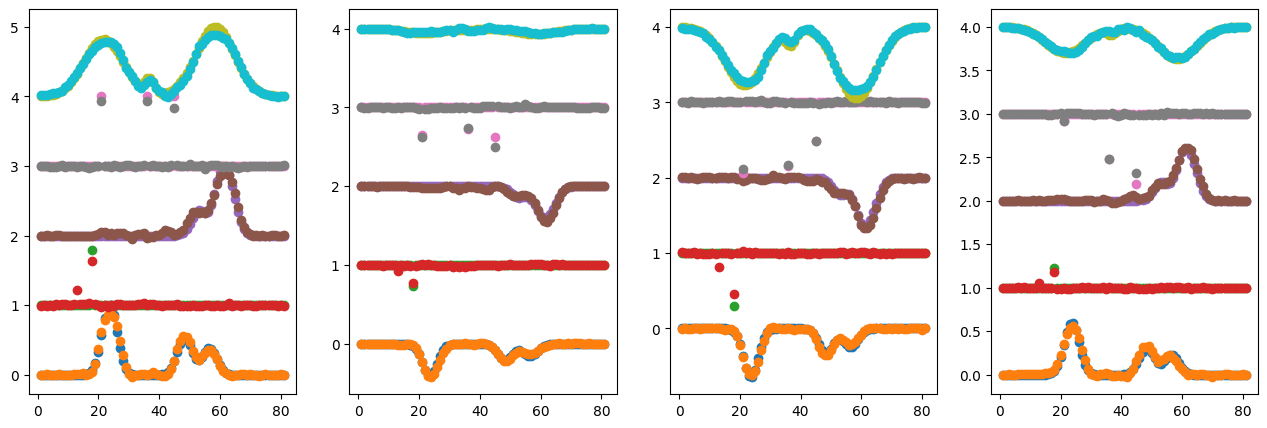

In [12]:
# ith reconstruction result
targets=targets_test
targets_pre=model.predict(inputs_test)
y_point=81
L=np.arange(start=1,stop=y_point+1,step=1)
ith=1
plt.figure(figsize=(20, 5))

hspace=1
plt.subplot(1, 5, 1)
for i in range(5):
    plt.scatter(L,targets[ith+i,0:y_point,0]+ hspace*i)
    plt.scatter(L,targets_pre[ith+i,0:y_point,0]+ hspace*i)

plt.subplot(1, 5, 2)
for i in range(5):
    plt.scatter(L,targets[ith+i,0:y_point,1]+ hspace*i)
    plt.scatter(L,targets_pre[ith+i,0:y_point,1]+ hspace*i)

plt.subplot(1, 5, 3)
for i in range(5):
    plt.scatter(L,targets[ith+i,0:y_point,2]+ hspace*i)
    plt.scatter(L,targets_pre[ith+i,0:y_point,2]+ hspace*i)

plt.subplot(1, 5, 4)
for i in range(5):
    plt.scatter(L,targets[ith+i,0:y_point,3]+ hspace*i)
    plt.scatter(L,targets_pre[ith+i,0:y_point,3]+hspace*i)   
plt.subplots_adjust(wspace=0.2)


s0 all data error: 0.11723435711035243
s1 all data error: 0.0696072054125733
s2 all data error: 0.0749971296618669
s3 all data error: 0.05927087214776497


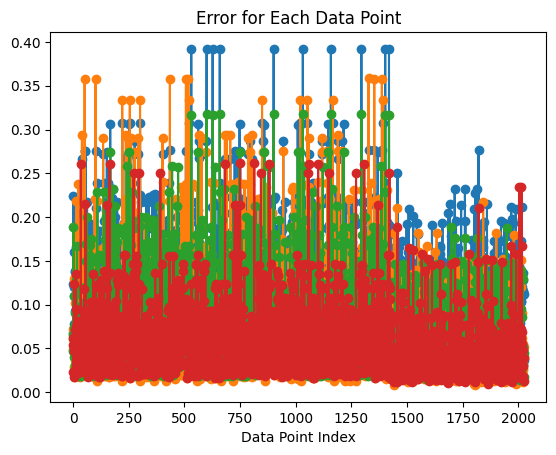

In [ ]:

errorsop=targets - targets_pre
msesop1=np.max(abs(errorsop),axis=1)
msesop=np.sqrt(np.mean(errorsop**2,axis=1))/np.sqrt(np.mean(targets**2,axis=1))
plt.plot(range(len(msesop)), msesop1, marker='o', linestyle='-')
plt.title('Error for Each Data Point')
plt.xlabel('Data Point Index')
errorall=msesop
errorall[:,1:]=msesop1[:,1:]
# np.savetxt('artaryinputbroadsop_error0610.csv', errorall, delimiter=',')
print("s0 all data error:",np.mean(msesop[:,0]))
print("s1 all data error:",np.mean(msesop1[:,1]))
print("s2 all data error:",np.mean(msesop1[:,2]))
print("s3 all data error:",np.mean(msesop1[:,3]))




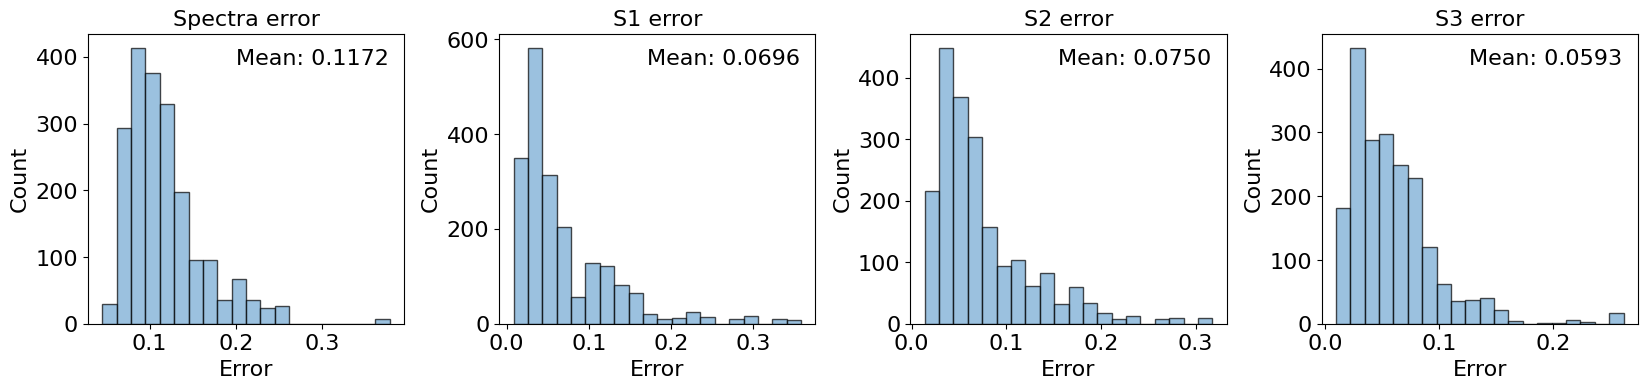

In [ ]:
data = errorall
n_cols = data.shape[1] 
fig, axes = plt.subplots( 1,n_cols, figsize=(20, 5)) 
fig.patch.set_facecolor("#FFFFFF") 
title = ["Spectra error","S1 error", "S2 error", "S3 error"]  

# 遍历每一列，绘制直方图+统计信息
for i in range(n_cols):
    col_data = data[:, i]  
    ax = axes[i]           
    ax.hist(
        col_data, 
        bins=20,           
        color="#71A7D2",   
        alpha=0.7,          
        edgecolor="black"  
    )
    mean_count=np.mean(col_data)
    ax.set_title(title[i], fontsize=16)
    ax.set_xlabel("Error", fontsize=16)
    ax.set_ylabel("Count",  fontsize=16) 
    ax.tick_params(axis="both")  
    ax.tick_params(axis='both', which='major', labelsize=16) 
    ax.tick_params(axis='both', which='minor', labelsize=12) 
    stats_text = (
       
        f"Mean: {mean_count:.4f}"
    )
    ax.text(
        0.95, 0.95,       
        stats_text, 
        transform=ax.transAxes, 
        ha="right",           
        va="top",             
        fontsize=16
    )

plt.subplots_adjust(
    bottom=0.3,
    wspace=0.3,
    hspace=0.4
)
plt.savefig('errorhistog.png', dpi=600,  bbox_inches='tight')
plt.show()

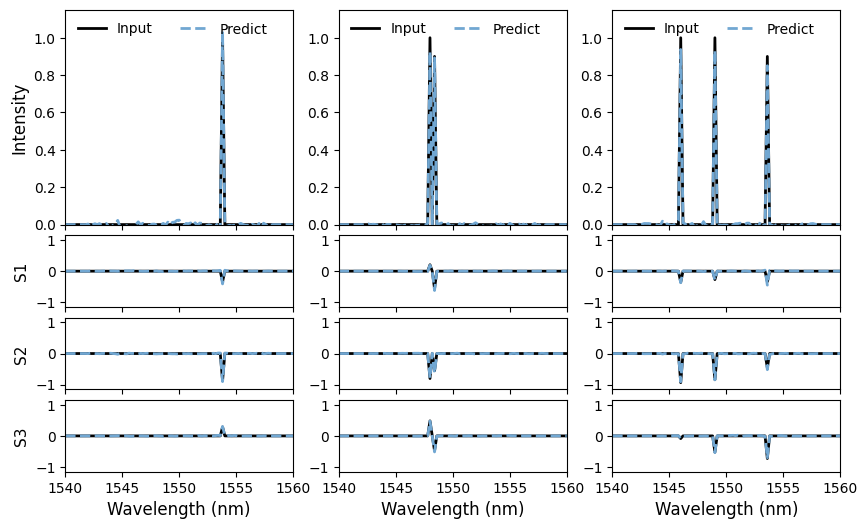

In [ ]:
# selected_indices = [1801,1797,1497] 
# # selected_indices = [145,142,224] #136 142 143 144 145 212 224 299 342
col_first_row = [1,2,3]
cols_second_row = [1, 2, 3]  

fig = plt.figure(figsize=(10, 6)) 
gs = gridspec.GridSpec(
    nrows=4, ncols=3, 
    height_ratios=[3, 1, 1, 1], 
    hspace=0.1,                   
    wspace=0.2      
)

wavelengths = np.linspace(1540, 1560, 101)
n=3*4
saved_data = np.zeros((101, n))
saved_data_pre = np.zeros((101, n))
for i, idx in enumerate(selected_indices):
    saved_data[10:91,4*i:4*(i+1)] = targets[idx,:,:]/np.max(targets[idx,:,0])   
    saved_data_pre[10:91,4*i:4*(i+1)]  = targets_pre[idx,:,:]/np.max(targets[idx,:,0])
    ax_first = fig.add_subplot(gs[0, i]) 

    ax_first.plot(
        wavelengths, saved_data[:, 4*i], 
        color="black", label="Input", linewidth=2
    )
    ax_first.plot(
        wavelengths, saved_data_pre[:, 4*i], 
        color="#71A7D2", linestyle="--", label="Predict", linewidth=2
    )
    plt.legend(loc='upper left', ncol=2, fontsize=10, frameon=True, framealpha=0)
    
    ax_first.set_xticks(np.arange(1540, 1561, 5))
    ax_first.set_ylim(0, 1.15)
    ax_first.set_xlim(1540, 1560)
    # ax_first.set_xlabel('Wavelength (nm)', fontsize=12)

    ax_first.set_xticklabels([]) 

    if i == 0:
        ax_first.set_ylabel("Intensity", fontsize=12)
  


y_labels = ["S1", "S2", "S3"]  

for col_idx, col in enumerate(cols_second_row):
    axs_col = [
        fig.add_subplot(gs[1, col_idx]),
        fig.add_subplot(gs[2, col_idx]),
        fig.add_subplot(gs[3, col_idx])
    ]

    for i, ax in enumerate(axs_col):
        ax.plot(
            wavelengths, saved_data[:, 4*(col-1)+i+1], 
            color="black", label="Input", linewidth=2
        )
        ax.plot(
            wavelengths, saved_data_pre[:, 4*(col-1)+i+1], 
            color="#71A7D2", linestyle="--", label="Predict", linewidth=2
        )
        
        if col_idx==0:
            ax.set_ylabel(y_labels[i], fontsize=11)
        
        if i >=2:        # 下方子图显示xlabel
            ax.set_xlabel('Wavelength (nm)', fontsize=12)
        else:
            ax.set_xticklabels([])
        ax.set_xticks(np.arange(1540, 1561, 5))
        ax.set_xlim(1540, 1560)
        ax.set_ylim(-1.15, 1.15)

# plt.savefig('discrete_spectra.png', dpi=600,  bbox_inches='tight')
plt.show()